In [44]:
import matplotlib.pyplot as plt
import cv2

In [45]:
cat4 = cv2.imread('../Computer-Vision-with-Python/DATA/CATS_DOGS/train/CAT/4.jpg')

In [46]:
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)

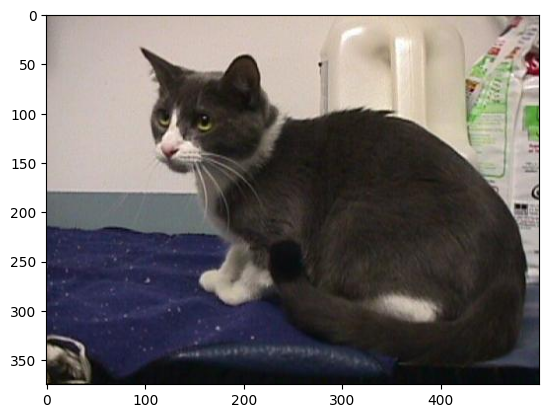

In [47]:
plt.imshow(cat4)

In [48]:
dog = cv2.imread('../Computer-Vision-with-Python/DATA/CATS_DOGS/train/DOG/2.jpg')

In [49]:
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

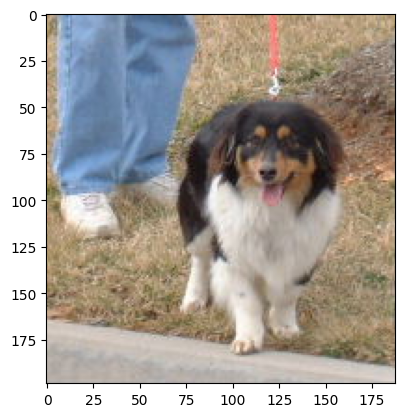

In [50]:
plt.imshow(dog)

In [51]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [52]:
image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest'
                               )

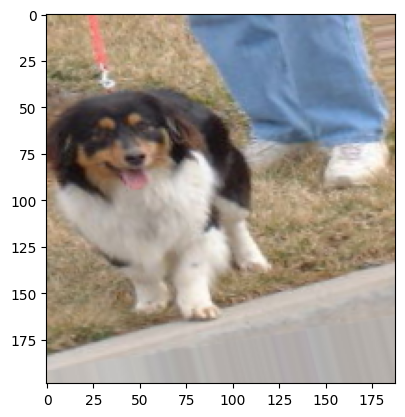

In [53]:
plt.imshow(image_gen.random_transform(dog))

In [54]:
image_gen.flow_from_directory('../Computer-Vision-with-Python/DATA/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [55]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Input, Dense

In [56]:
model = Sequential()

model.add(Input(shape=(150,150,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     2,367,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,424,065 (9.25 MB)

 Trainable params: 2,424,065 (9.25 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
batch_size = 16

train_image_generator = image_gen.flow_from_directory('../Computer-Vision-with-Python/DATA/CATS_DOGS/train',
                                                      target_size=(150,150),
                                                      batch_size=batch_size,
                                                      class_mode='binary')

Found 18743 images belonging to 2 classes.


In [59]:
test_image_generator = image_gen.flow_from_directory('../Computer-Vision-with-Python/DATA/CATS_DOGS/test',
                                                      target_size=(150,150),
                                                      batch_size=batch_size,
                                                      class_mode='binary')

Found 6251 images belonging to 2 classes.


In [60]:
train_image_generator.class_indices

{'CAT': 0, 'DOG': 1}

In [61]:
results = model.fit(train_image_generator, epochs=1, steps_per_epoch=150,
                              validation_data=test_image_generator, validation_steps=12)

c:\Users\user\anaconda3\envs\udemy-cv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 98ms/step - accuracy: 0.4948 - loss: 0.7356 - val_accuracy: 0.5990 - val_loss: 0.6898


In [62]:
results.history['accuracy']

[0.5133333206176758]

In [63]:
from keras.preprocessing import image

In [64]:
dog_file = '../Computer-Vision-with-Python/DATA/CATS_DOGS/test/DOG/10005.jpg'

In [65]:
dog_img = image.load_img(dog_file, target_size=(150,150))

In [66]:
dog_img = image.img_to_array(dog_img)

In [67]:
dog_img.shape

(150, 150, 3)

In [68]:
import numpy as np

In [69]:
dog_img = np.expand_dims(dog_img, axis=0)

In [70]:
dog_img = dog_img/255

In [71]:
model.predict(dog_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[0.49278146]], dtype=float32)